Step 1: Setup and Data Loading
This cell imports the necessary libraries and loads the cleaned dataset.

In [5]:
%pip install pandas numpy matplotlib seaborn scikit-learn jupyterlab


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned dataset
df = pd.read_csv('Sleep_health_and_lifestyle_cleaned.csv')

print("Loaded Data Head:")
print(df.head())
print("\nData Shape:", df.shape)

Loaded Data Head:
   Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   27             6.1                 6                       42   
1   28             6.2                 6                       60   
2   28             6.2                 6                       60   
3   28             5.9                 4                       30   
4   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  Systolic BP  Diastolic BP  \
0             6          77         4200          126            83   
1             8          75        10000          125            80   
2             8          75        10000          125            80   
3             8          85         3000          140            90   
4             8          85         3000          140            90   

   Gender_Male  ...  Occupation_Nurse  Occupation_Sales Representative  \
0            1  ...                 0                             

Step 2: Feature Engineering and Data Splitting
This cell defines the features (X) and the target variable (y), and then splits the data into training and testing sets.

In [10]:
# Define the target variable (y) and features (X)
target_column = 'Stress Level'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 299 samples
Testing set size: 75 samples


Step 3: Model Training
This cell initializes and trains the Random Forest Regressor.

In [11]:
# Initialize the Random Forest Regressor
# A random forest is a good choice for regression as it handles non-linear relationships well.
model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    random_state=42,
    n_jobs=-1          # Use all available processors
)

# Train the model
model.fit(X_train, y_train)

print("Random Forest Regressor training complete.")

Random Forest Regressor training complete.


Step 4: Model Evaluation
This cell evaluates the model's performance on the test set using common regression metrics: R 
2
  Score (coefficient of determination) and Mean Absolute Error (MAE).

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2) Score: {r2:.3f}")

# The MAE indicates the average magnitude of the error in predicted stress level.
# The R2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables.


Model Evaluation:
Mean Absolute Error (MAE): 0.053
R-squared (R2) Score: 0.990


Step 5: Feature Importance Visualization
This cell helps understand which input features are the most significant predictors of 'Stress Level'.

C:\Users\gmmst\AppData\Local\Temp\ipykernel_18120\1158124103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


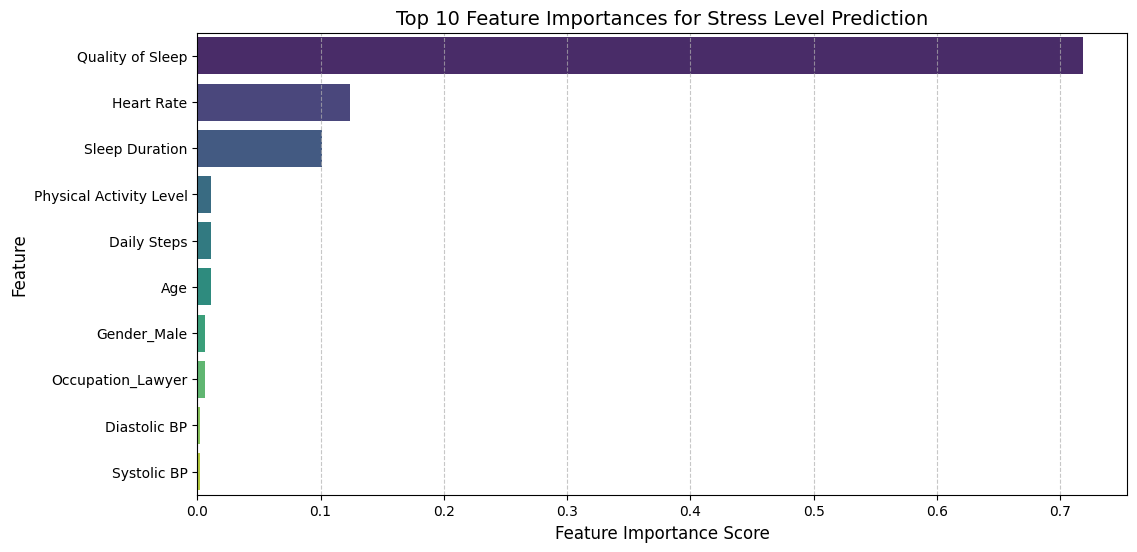

In [13]:
# Get feature importance scores
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Select top 10 features for visualization
top_10_features = feature_importances.nlargest(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Feature Importances for Stress Level Prediction', fontsize=14)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()